In [2]:
from pathlib import Path
import sys
import seaborn

sys.path.append("..")

from metadataset.ftc.metadataset import FTCMetadataset

In [8]:

data_dir = Path("..") / "data" 
data_version = "mini"
#data_version = "extended"
metadataset = FTCMetadataset(data_dir=str(data_dir), 
                             metric_name="error",
                             data_version=data_version)
dataset_names = metadataset.get_dataset_names()
dataset_names

['imdb',
 'mteb/tweet_sentiment_extraction',
 'ag_news',
 'dbpedia_14',
 'stanfordnlp/sst2',
 'SetFit/mnli']

In [11]:
for dataset_name in dataset_names:

    metadataset.set_state(dataset_name=dataset_name,
                        split="valid")
    hp_candidates, indices = metadataset._get_hp_candidates_and_indices()
    predictions = metadataset.get_predictions([[0]])
    targets = metadataset.get_targets()
    num_configs = len(hp_candidates)
    num_classes = max(targets)
    num_val_samples = len(targets)

    metadataset.set_state(dataset_name=dataset_name,
                        split="test")
    targets = metadataset.get_targets()
    num_test_samples = len(targets)

    print("Dataset:", dataset_name,
        "num_configs:", num_configs,
          "num_classes:", num_classes,
           "num_val_samples:", num_val_samples,
           "num_test_samples:", num_test_samples)

Dataset: imdb num_configs: 125 num_classes: tensor(1) num_val_samples: 5000 num_test_samples: 25000
Dataset: mteb/tweet_sentiment_extraction num_configs: 100 num_classes: tensor(2) num_val_samples: 5497 num_test_samples: 3534
Dataset: ag_news num_configs: 120 num_classes: tensor(3) num_val_samples: 24000 num_test_samples: 7600
Dataset: dbpedia_14 num_configs: 65 num_classes: tensor(13) num_val_samples: 112000 num_test_samples: 70000
Dataset: stanfordnlp/sst2 num_configs: 125 num_classes: tensor(1) num_val_samples: 13470 num_test_samples: 10776
Dataset: SetFit/mnli num_configs: 100 num_classes: tensor(2) num_val_samples: 78541 num_test_samples: 62833


In [10]:
data_version

'mini'

tensor([[8.0000e+00, 5.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.0000e+00, 1.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.0000e+00, 5.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.0000e+00, 1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.0000e+00, 1.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.6000e+01, 5.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.6000e+01, 1.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.6000e+01, 5.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.6000e+01, 1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.6000e+01, 1.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [3.2000e+01, 5.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [3.2000e+01, 1.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [3.2000e

In [64]:
hp_candidates, indices = metadataset._get_hp_candidates_and_indices()
print(hp_candidates.shape)
metadataset._get_worst_and_best_performance()

torch.Size([99, 6])


(0.7529999613761902, 0.04462500289082527)

In [65]:
metadataset.get_predictions([[1]])

tensor([[[[9.9487e-01, 6.0686e-08, 4.8151e-03, 3.1645e-04],
          [4.7717e-05, 9.9988e-01, 6.8001e-05, 2.8527e-06],
          [9.9917e-01, 3.2643e-05, 7.9838e-04, 1.3009e-06],
          ...,
          [6.9304e-02, 7.4301e-09, 9.2238e-01, 8.3122e-03],
          [4.5482e-04, 7.6472e-01, 2.3473e-01, 9.8861e-05],
          [1.0000e+00, 2.5454e-10, 3.2735e-08, 3.2222e-07]]]])

In [66]:
metrics = metadataset.evaluate_ensembles([indices.tolist()])[2].T

In [67]:
metrics

tensor([[0.1247],
        [0.1427],
        [0.0768],
        [0.0565],
        [0.0767],
        [0.1203],
        [0.1334],
        [0.0692],
        [0.0570],
        [0.0772],
        [0.1433],
        [0.1266],
        [0.0680],
        [0.0568],
        [0.0777],
        [0.1813],
        [0.1308],
        [0.0670],
        [0.0568],
        [0.0738],
        [0.2261],
        [0.1331],
        [0.0650],
        [0.0562],
        [0.0763],
        [0.7525],
        [0.7525],
        [0.7479],
        [0.0525],
        [0.0641],
        [0.7479],
        [0.7479],
        [0.7479],
        [0.0523],
        [0.0660],
        [0.7479],
        [0.7479],
        [0.7525],
        [0.0525],
        [0.0663],
        [0.7479],
        [0.7525],
        [0.7525],
        [0.0512],
        [0.0643],
        [0.7479],
        [0.7525],
        [0.7525],
        [0.0514],
        [0.0639],
        [0.7525],
        [0.7525],
        [0.7525],
        [0.0575],
        [0.0653],
        [0

In [68]:
predictions = metadataset.get_predictions([[0]])
targets = metadataset.get_targets()

In [69]:
predictions.argmax(-1)

tensor([[[0, 1, 0,  ..., 2, 2, 0]]])

In [70]:
targets

tensor([0, 1, 0,  ..., 2, 2, 0])

<Axes: >

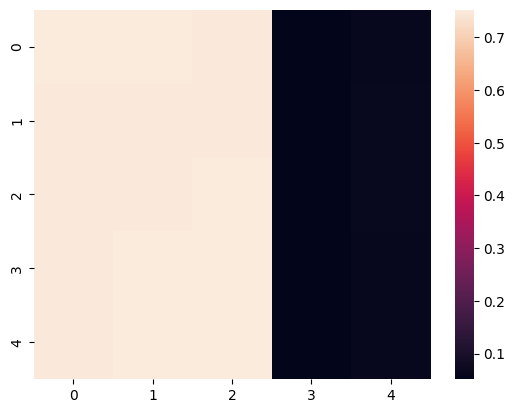

In [75]:
i=1
results =metrics[25*i:(i+1)*25].reshape(5,5)
seaborn.heatmap(results)

In [76]:
results

tensor([[0.7525, 0.7525, 0.7479, 0.0525, 0.0641],
        [0.7479, 0.7479, 0.7479, 0.0523, 0.0660],
        [0.7479, 0.7479, 0.7525, 0.0525, 0.0663],
        [0.7479, 0.7525, 0.7525, 0.0512, 0.0643],
        [0.7479, 0.7525, 0.7525, 0.0514, 0.0639]])

In [55]:
metadataset.get_targets().shape

torch.Size([24000])

In [56]:
metadataset.get_num_classes()

4

In [57]:
metadataset.export_failed_configs("../bash_args/")